In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/content/weight-height.csv')

In [17]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<ipython-input-18-ca91d7e08638>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
<ipython-input-18-ca91d7e08638>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


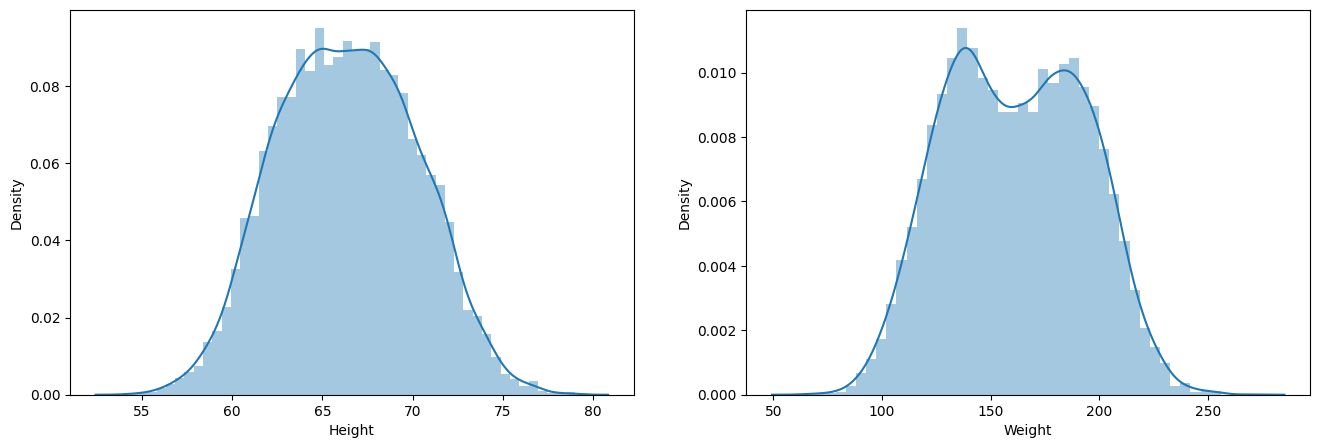

In [18]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df['Height'])

plt.subplot(1,2,2)
sns.distplot(df['Weight'])

plt.show()

In [19]:
df.shape

(10000, 3)

In [20]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<ipython-input-21-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

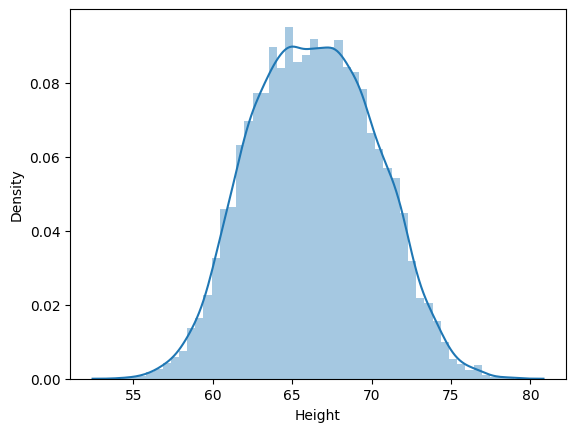

In [21]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

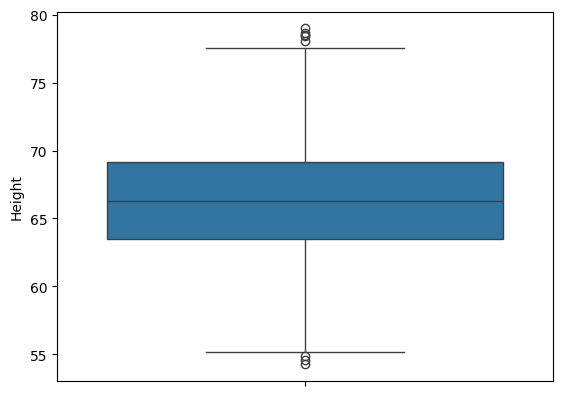

In [22]:
sns.boxplot(df['Height'])

In [23]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)
print(" ------------ Limitations ------------ ")
print(f'Upper Limit : {upper_limit}')
print(f'Lower Limit : {lower_limit}')

 ------------ Limitations ------------ 
Upper Limit : 74.7857900583366
Lower Limit : 58.13441158671655


In [26]:
df[(df['Height'] >= 74.7857900583366) | (df['Height'] <= 58.13441158671655)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming

In [28]:
# The values we need
new_df = df[(df['Height'] <= 74.7857900583366) & (df['Height'] >= 58.13441158671655)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [31]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [30]:
new_df['Height'].describe()

,Height
count,9800.000000
mean,66.364366
std,3.645075
min,58.134496
25%,63.577162
50%,66.318070
75%,69.119896
max,74.785714


<ipython-input-32-edc1cb406df2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

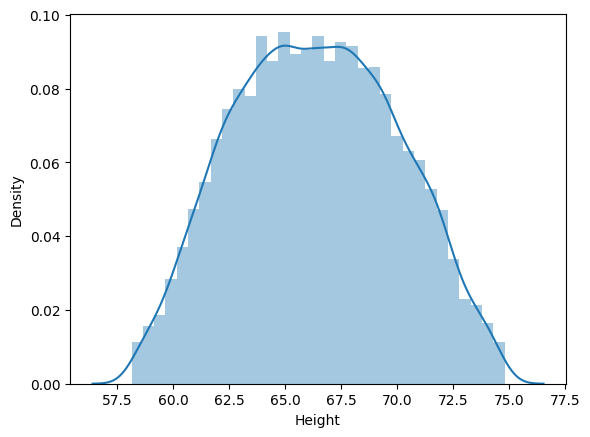

In [32]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

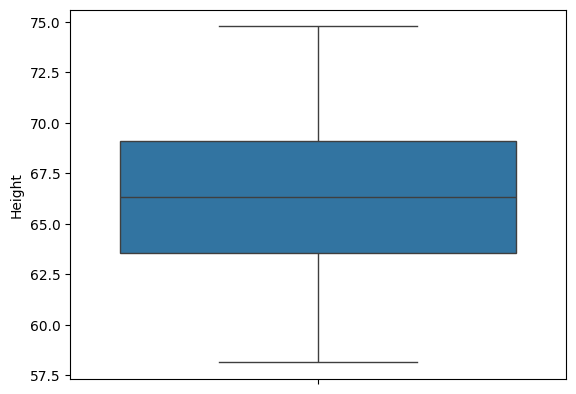

In [33]:
sns.boxplot(new_df['Height'])

# Capping
This method is called Winsorization

In [35]:
df['Height'] = np.where(df['Height'] >= upper_limit, upper_limit, np.where(df['Height']<=lower_limit, lower_limit, df['Height']))

In [36]:
df.shape

(10000, 3)

In [37]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.366281
std,3.795717
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.785790


<ipython-input-38-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

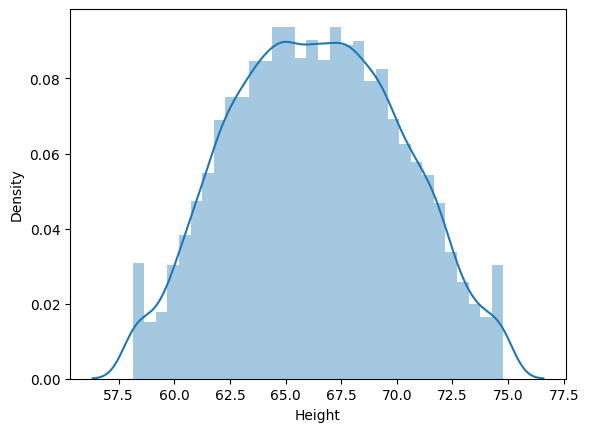

In [38]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

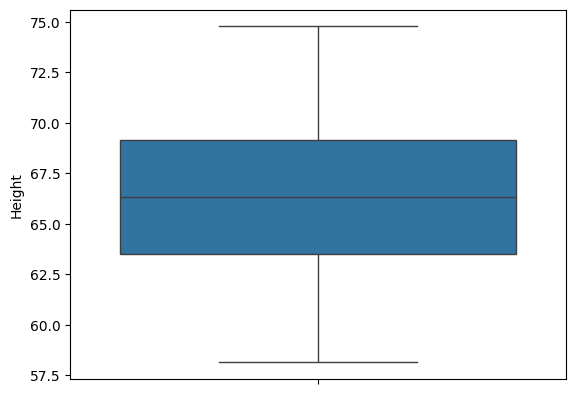

In [39]:
sns.boxplot(df['Height'])